In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhijitdahatonde/swiggy-restuarant-dataset")

print("Path to dataset files:", path)

In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [54]:
df=pd.read_csv("swiggy.csv")
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [ ]:
### Count Restaurants

In [55]:
df["Restaurant"].nunique()

7865

In [56]:
### Find Maximum Price:

In [57]:
df["Price"].max()

np.float64(2500.0)

In [58]:
### Average Ratings

In [59]:
df["Avg ratings"].mean().round(2)

np.float64(3.66)

In [60]:
### Total Ratings:

In [61]:
df["Avg ratings"].sum().round(2)

np.float64(31726.3)

In [62]:
#### Food Type Count

In [63]:
df["Food type"].str.split(",",expand=True).stack().nunique()

601

In [64]:
## Medium Questions

In [65]:
## City Analysis:

In [66]:
cities_max_restaurant=df.groupby("City")["Restaurant"].count().reset_index(name="No_of _restaurant").sort_values(by="No_of _restaurant",ascending=False)
cities_max_restaurant.head(3)

,City,No_of _restaurant
5,Kolkata,1346
6,Mumbai,1277
2,Chennai,1106


In [67]:
### Price Comparison

In [68]:
df["Food type"].str,split(",",expand=True).

SyntaxError: invalid syntax (1760163288.py, line 1)

In [69]:
##Rating Distribution

In [76]:
Rating_dist=df.groupby("Restaurant")["Avg ratings"].mean().reset_index()
Rating_dist=Rating_dist.head(50)

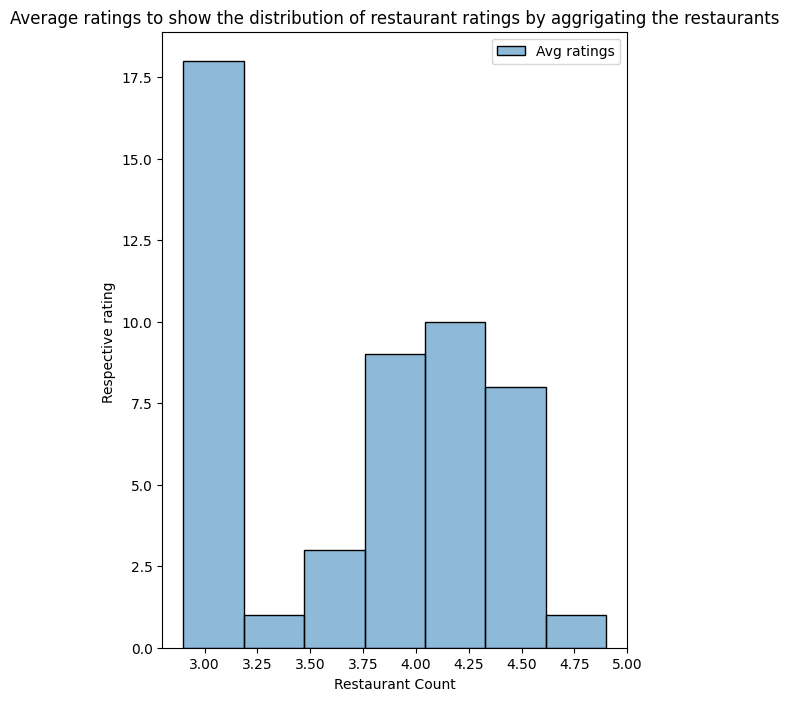

In [84]:
plt.figure(figsize=(6,8))
sns.histplot(data=Rating_dist)
plt.xlabel("Restaurant Count")
plt.ylabel("Respective rating ")
plt.title("Average ratings to show the distribution of restaurant ratings by aggrigating the restaurants")
plt.show()

In [72]:
### Delivery Time Analysis:

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [85]:
df[df["Avg ratings"]>4]["Delivery time"].mean()

np.float64(51.989083596667626)

In [ ]:
###Top Rated Restaurants:

In [86]:
top_5=df.sort_values(by="Avg ratings",ascending=False).head()
top_5=top_5[["Restaurant","Food type","Avg ratings"]]
top_5

,Restaurant,Food type,Avg ratings
5424,Get In My Belly,Indian,5.0
5425,The Asian Pavilion,Asian Chinese,5.0
5519,Cafe Kokomo,"Beverages,Snacks,Desserts,Bakery",5.0
8571,Afresh,"Healthy Food,Salads,Desserts,Beverages",5.0
6297,Fat Tiger,"Pizzas,Chinese,Snacks,Beverages,American",5.0


# Hard Questions


In [ ]:
### Correlation Analysis

In [87]:
df["Price"].corr(df["Avg ratings"])

np.float64(0.11363038630435676)

#### here the corelation coeficient is 0.1 which is slighlty positive and greater than 0 . so  here we can say that there is weak  positive relation between the price and the rating 

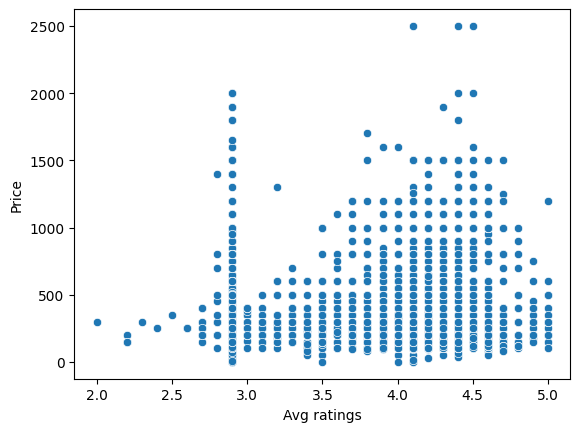

In [88]:
sns.scatterplot(x=df["Avg ratings"],y=df["Price"])
plt.show()


In [ ]:
### Delivery Time Outliers

In [89]:
df["Restaurant"].value_counts()

Restaurant
La Pino'Z Pizza              13
Baskin Robbins               10
Nic Natural Ice Creams       10
Subway                       10
Kfc                           9
                             ..
Zaika The Bakers              1
Bangarpet Chats               1
Shree Ram Parotha House       1
Juice World Fresh N Juicy     1
Jay Arbuda Food Point         1
Name: count, Length: 7865, dtype: int64

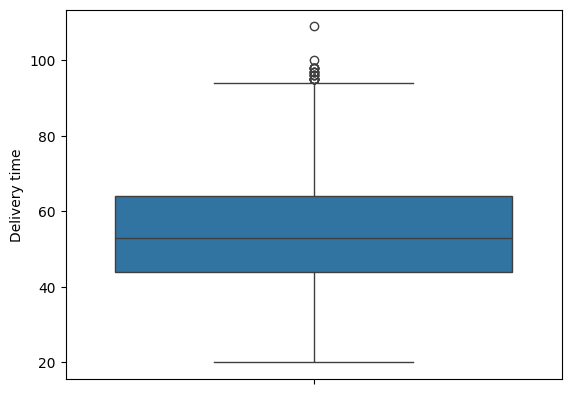

In [90]:
sns.boxplot(df["Delivery time"])
plt.show()

#### from this boxplot we can  say that the  mean delivery time is  50-55 minutes where the  delivery time above 95 min are consider to be outliers  whic are above the interquartile range   

In [91]:
### Price and Ratings Box Plot

### with forming the categories

In [99]:
def rating(rate):
    if rate <3:
        return "Below 3"
    elif rate >3 and rate <4:
        return "Between 3-4"
    else:
        return" Above 4"
df["Rating_category"]=df["Avg ratings"].apply(rating)
data_cat=df[["Rating_category","Avg ratings"]]

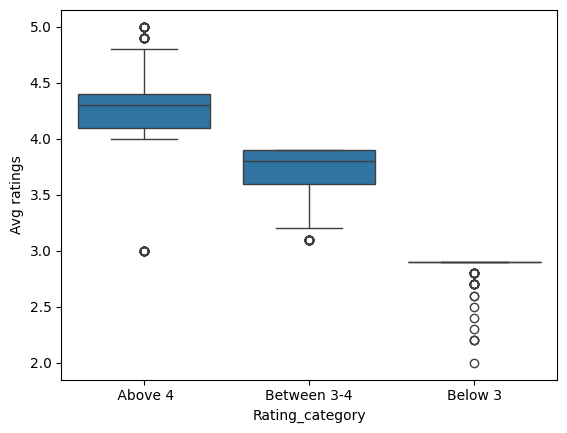

In [104]:
sns.boxplot(data=data_cat,y="Avg ratings",x="Rating_category")
plt.show()

### without formaing the  categories


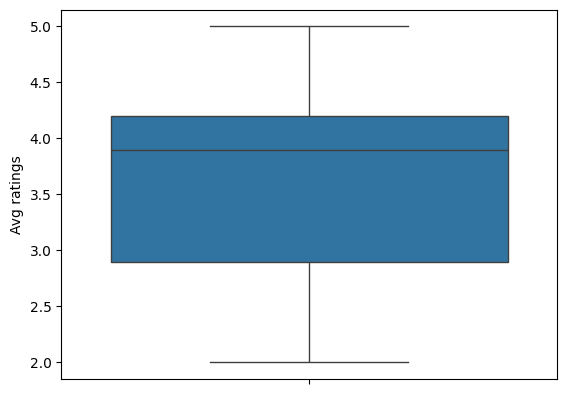

In [105]:
sns.boxplot(data=df["Avg ratings"])
plt.show()

In [ ]:
### Group Analysis 

In [151]:
data_grouped=(df.groupby("City")[["Price","Avg ratings"]].mean())


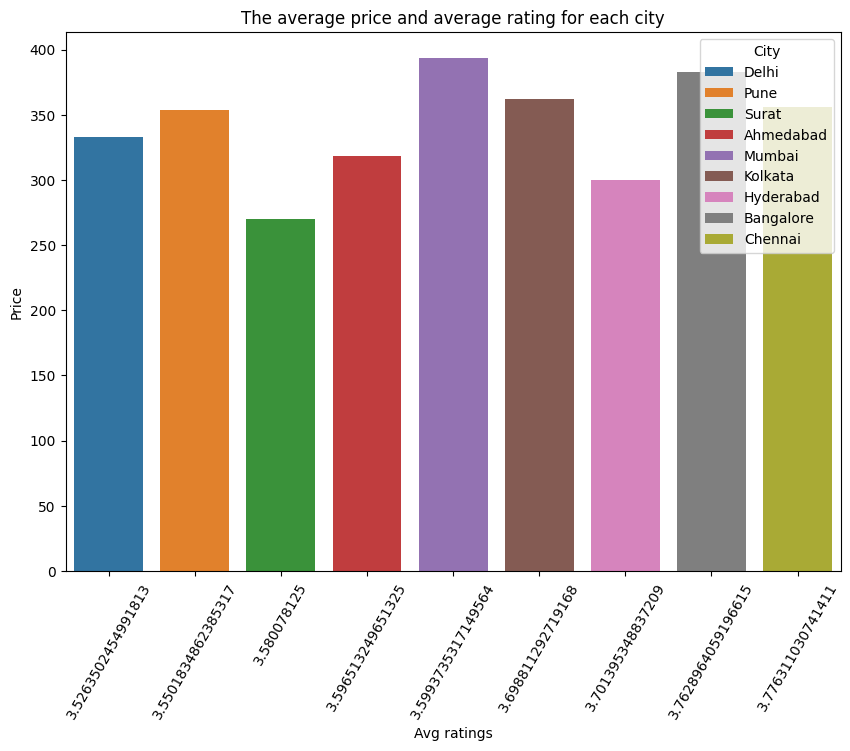

In [152]:
plt.figure(figsize=(10,7))
sns.barplot(data=data_grouped,x="Avg ratings",y="Price",hue="City")
plt.xlabel("Avg ratings")
plt.xticks(rotation=60)
plt.ylabel("Price")
plt.title("The average price and average rating for each city")
plt.show()

In [94]:
data_rateing=df.groupby("Avg ratings")["Price"].count()

Avg ratings
2.0       1
2.2       3
2.3       1
2.4       1
2.5       1
2.6       2
2.7      11
2.8      15
2.9    3279
3.0      25
3.1      26
3.2      45
3.3      51
3.4      60
3.5      95
3.6     118
3.7     207
3.8     313
3.9     421
4.0     524
4.1     700
4.2     754
4.3     792
4.4     573
4.5     338
4.6     166
4.7      96
4.8      29
4.9      15
5.0      18
Name: Price, dtype: int64

In [93]:
maximum_price=df.groupby("Restaurant")["Price"].max().reset_index().sort_values(by="Price",ascending=False)
maximum_price

,Restaurant,Price
4119,Malgudi - The Savera Hotel,2500.0
3207,Itc Windsor - Gourmet Couch,2500.0
4952,Origami Japanese & Korean Restaurant,2500.0
1692,Conrad Pune,2000.0
7774,Yauatcha,2000.0
...,...,...
4581,Murugappa Mess,1.0
4493,Mozza,0.0
3806,Ladli Fast Food,0.0
1687,Comfy Restaurant,0.0
